<a href="https://colab.research.google.com/github/ThuanPhong0126/CS114.K21/blob/master/RandomForestClassification_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
pwd

'/content/drive/My Drive/Colab Notebooks/ML'

In [2]:
cd /content/drive/My Drive/Colab Notebooks/ML

/content/drive/My Drive/Colab Notebooks/ML


In [3]:
pwd

'/content/drive/My Drive/Colab Notebooks/ML'

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thuanphong","key":"ffc8cd53940c5c0bf1c827618250572d"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list -s fashion

ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
zalando-research/fashionmnist                                  Fashion MNIST                                      69MB  2017-12-07 00:54:20          59376  
paramaggarwal/fashion-product-images-dataset                   Fashion Product Images Dataset                     23GB  2019-03-14 18:57:43           4640  
paramaggarwal/fashion-product-images-small                     Fashion Product Images (Small)                    565MB  2019-04-26 16:33:51           3273  
datamunge/sign-language-mnist                                  Sign Language MNIST                                63MB  2017-10-20 15:09:18          21583  
nitinsss/fashion-dataset-with-over-15000-labelled-images  

In [8]:
!kaggle datasets download -d zalando-research/fashionmnist 

 97% 67.0M/68.8M [00:02<00:00, 26.2MB/s]
100% 68.8M/68.8M [00:02<00:00, 28.0MB/s]


In [0]:
!unzip -q fashionmnist.zip

In [0]:
import pandas as pd
import numpy as np

In [0]:
train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')

In [89]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [90]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [18]:
labels=pd.crosstab(index=train['label'],columns='count')
labels

col_0,count
label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


In [67]:
img=train[1:2]
img

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
img=np.array(img)
img=img[0]

In [0]:
index=[0]
img=np.delete(img,index)

In [0]:
img=np.reshape(img,(28,28))
img

In [0]:
import matplotlib.pyplot as plt
import cv2

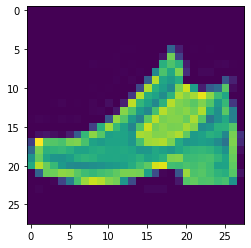

In [91]:
plt.imshow(img)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [93]:
model=RandomForestClassifier(n_estimators=64,n_jobs=1)
model.fit(train.drop('label',axis=1),train['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
y_pred=model.predict(test.drop('label',axis=1))

In [95]:
print(confusion_matrix(test['label'],y_pred))

[[853   0  14  33   2   2  86   0  10   0]
 [  2 971   4  16   2   1   4   0   0   0]
 [  7   1 809  10 106   0  60   0   7   0]
 [ 25   7   7 923  22   0  16   0   0   0]
 [  2   0  60  30 863   0  42   0   3   0]
 [  0   0   0   0   0 944   0  39   5  12]
 [161   1 104  27  87   0 605   0  15   0]
 [  0   0   0   0   0  17   0 931   0  52]
 [  1   1   9   0   4   2   7   2 973   1]
 [  0   0   1   0   0   8   0  40   2 949]]


In [96]:
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.89      0.92      0.91      1000
           4       0.79      0.86      0.83      1000
           5       0.97      0.94      0.96      1000
           6       0.74      0.60      0.66      1000
           7       0.92      0.93      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [97]:
print(accuracy_score(test['label'],y_pred))

0.8821


In [0]:
 from sklearn.model_selection import GridSearchCV

In [0]:
param_grid={'n_estimators':[1,50,64],
                    'bootstrap':[True,False]}
forest_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                         param_grid=param_grid,
                         scoring="accuracy",
                         cv=3,
                         n_jobs=1)
                

In [104]:
forest_grid.fit(train.drop('label',axis=1),train['label'])

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [105]:
forest_grid.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
model=RandomForestClassifier(n_estimators=64,bootstrap=False,n_jobs=1)
model.fit(train.drop('label',axis=1),train['label'])
y_pre=model.predict(test.drop('label',axis=1))

In [109]:
print(accuracy_score(test['label'],y_pre))

0.8875
